Neste notebook descrevemos o conjunto de bibliotecas exploratorias do R conhecidos como tidyverse

Estes serão:

ggplot2
tibble
tidyr
readr
purrr
dplyr
stringr
forcats

Neste notebook discutimos o ggplot2

In [1]:
require(tidyverse)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#primeiramente falamos do ggplot para isto leremos o dataset do Kickstarter
kick<-read.csv("Kickstarter.csv")
head(kick)

backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,⋯,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
80,"If you've ever been disheartened by how some people might represent the character of Christ, this is the book for you.","{""id"":48,""name"":""Nonfiction"",""slug"":""publishing/nonfiction"",""position"":9,""parent_id"":18,""color"":14867664,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/publishing/nonfiction""}}}",3651,US,1364866426,"{""id"":101710808,""name"":""Neal Samudre"",""is_registered"":true,""chosen_currency"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/007/433/802/5a05d2657311dda3493f755809a13ce5_original.jpg?w=40&h=40&fit=crop&v=1461457087&auto=format&q=92&s=de68f6f512ab848889660eff97785bd9"",""small"":""https://ksr-ugc.imgix.net/assets/007/433/802/5a05d2657311dda3493f755809a13ce5_original.jpg?w=160&h=160&fit=crop&v=1461457087&auto=format&q=92&s=8a693b4b2db9d0c81049be28174d30e3"",""medium"":""https://ksr-ugc.imgix.net/assets/007/433/802/5a05d2657311dda3493f755809a13ce5_original.jpg?w=160&h=160&fit=crop&v=1461457087&auto=format&q=92&s=8a693b4b2db9d0c81049be28174d30e3""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/101710808""},""api"":{""user"":""https://api.kickstarter.com/v1/users/101710808?signature=1536906692.49e83297aa69d354118a4b52764ffae51db55ae3""}}}",USD,$,true,⋯,how-weve-changed-jesus-neal-samudres-debut-book,https://www.kickstarter.com/discover/categories/publishing/nonfiction,true,false,successful,1365789635,1.0000000,"{""web"":{""project"":""https://www.kickstarter.com/projects/101710808/how-weve-changed-jesus-neal-samudres-debut-book?ref=category_newest"",""rewards"":""https://www.kickstarter.com/projects/101710808/how-weve-changed-jesus-neal-samudres-debut-book/rewards""}}",3651.0000,international
31,This book will show you how to attract your ideal client and get them to buy from you again and again without ever selling.,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishing/nonfiction"",""position"":9,""parent_id"":18,""color"":14867664,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/publishing/nonfiction""}}}",326,GB,1482012501,"{""id"":270084862,""name"":""Scott C. Campbell"",""is_registered"":true,""chosen_currency"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/014/918/680/3ca628ee12fe98dcf17e859eaa7438e1_original.JPG?w=40&h=40&fit=crop&v=1482010204&auto=format&q=92&s=9b224a044b4312cce4a8057dc56800ad"",""small"":""https://ksr-ugc.imgix.net/assets/014/918/680/3ca628ee12fe98dcf17e859eaa7438e1_original.JPG?w=160&h=160&fit=crop&v=1482010204&auto=format&q=92&s=cfb4a9568a8849d860255653edb453d8"",""medium"":""https://ksr-ugc.imgix.net/assets/014/918/680/3ca628ee12fe98dcf17e859eaa7438e1_original.JPG?w=160&h=160&fit=crop&v=1482010204&auto=format&q=92&s=cfb4a9568a8849d860255653edb453d8""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/270084862""},""api"":{""user"":""https://api.kickstarter.com/v1/users/270084862?signature=1536906911.af67c970df0e557656c25eb5b939f7a33ec0f517""}}}",GBP,£,false,⋯,your-client-vision-book-how-to-sell-without-sellin,https://www.kickstarter.com/discover/categories/publishing/nonfiction,true,false,successful,1484606700,1.2473525,"{""web"":{""project"":""https://www.kickstarter.com/projects/270084862/your-client-vision-book-how-to-sell-without-sellin?ref=category_newest"",""rewards"":""https://www.kickstarter.com/projects/270084862/your-client-vision-book-how-to-sell-without-sellin/rewards""}}",338.0325,international
357,"Our goal is to re-publish 500 old Christian books. Available to read online, to download, or as physical books. Help us make it!","{""id"":48,""name"":""Nonfiction"",""slug"":""publishing/nonfiction"",""position"":9,""parent_id"":18,""color"":14867664,""urls"":{""web"":{""discover"":""http

A estrutura da biblioteca ggplot é dada por camadas chamadas geoms, criamos um objeto ggplot e podemos ir adicionando novas camadas para construir  o grafico final observe no exemplo a seguir

In [3]:
Objeto=ggplot(data=kick)
Objeto=Objeto + geom_point( aes(x=backers_count,y=converted_pledged_amount) )

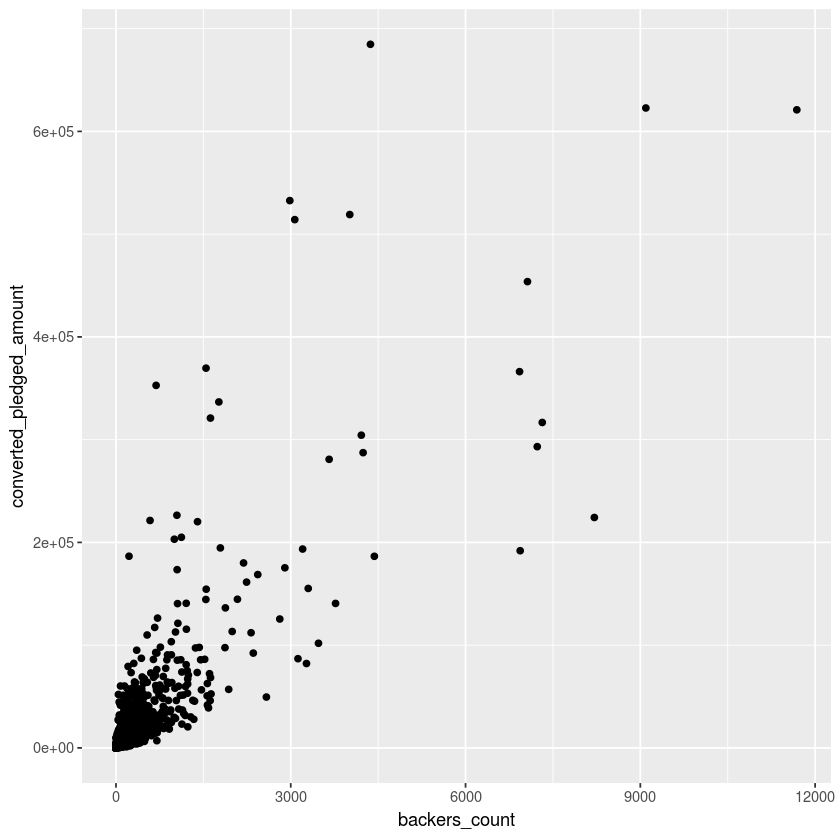

In [4]:
print(Objeto)

Consideremos que queremos agora adicionar uma linha sobre este objeto

In [5]:
Objeto1=Objeto+ geom_line(aes(x=backers_count,y=converted_pledged_amount,col="red"))


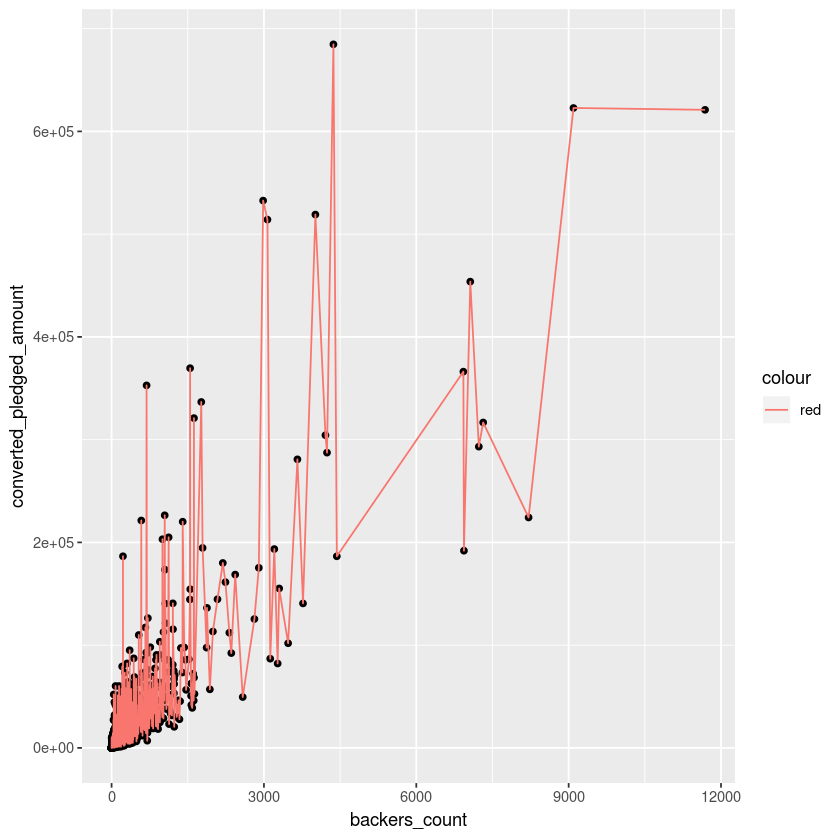

In [6]:
print(Objeto1)

Poderiamos claro inserir outros atributos, como por exemplo ajustar a curva por um smooth

In [7]:
Objeto1=Objeto+geom_smooth(aes(x=backers_count,y=converted_pledged_amount,col="red"))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


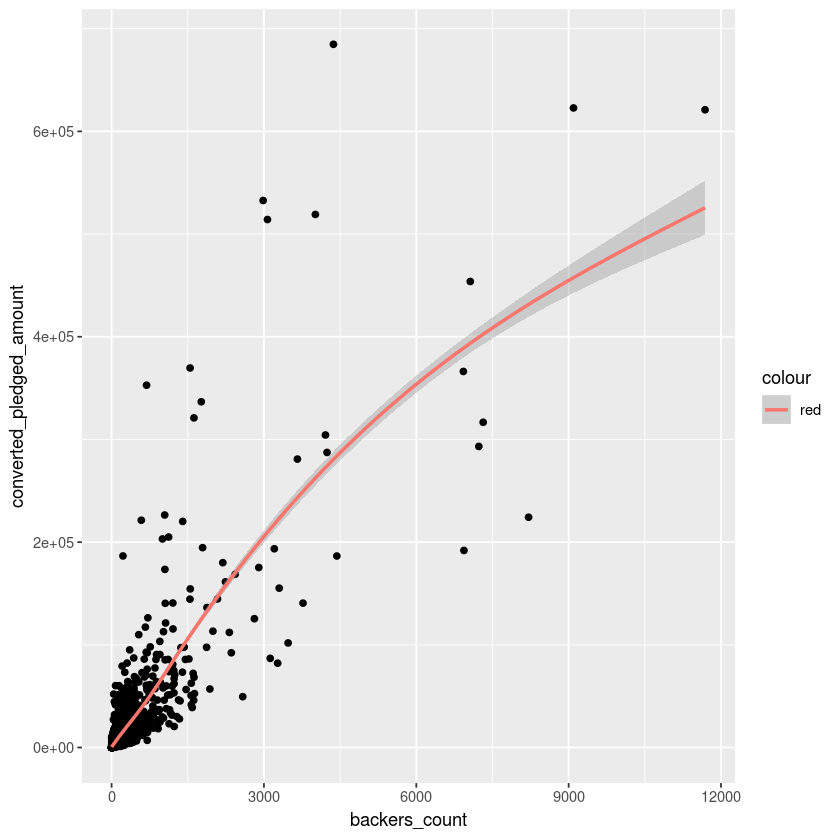

In [8]:
print(Objeto1)

Poderiamos claro incluir novos labels

In [9]:
Objeto1=Objeto1+ labs(x="Este e o eixo x",y="Este e o eixo Y",col='Nome para as cores')

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


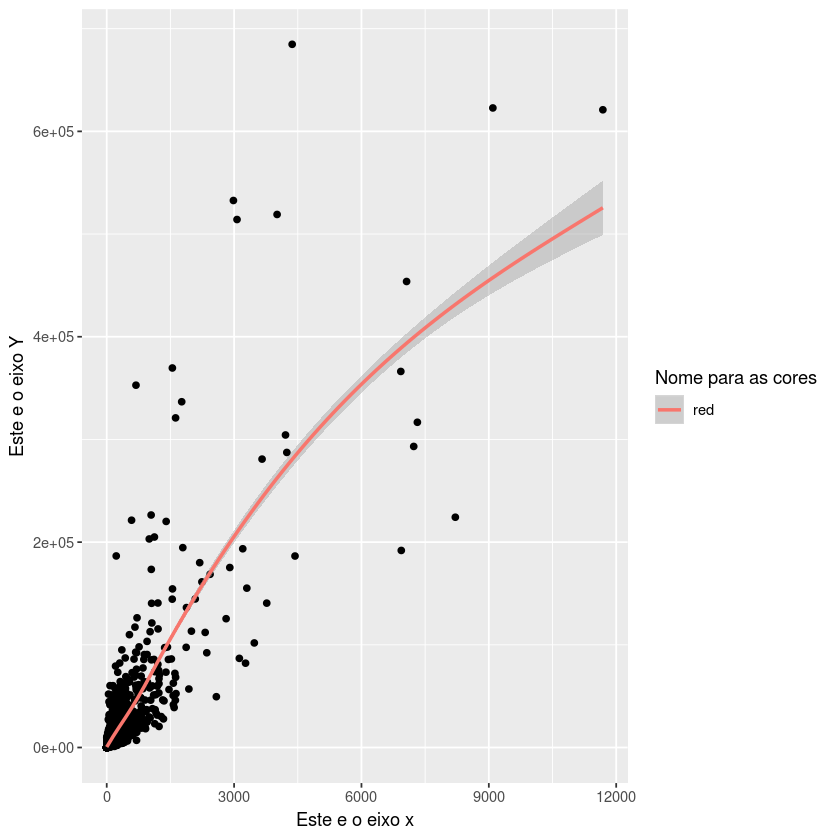

In [10]:
print(Objeto1)

Podemos gerar varios tipos de gráficos utilizando o ggplot, como por exemplo

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

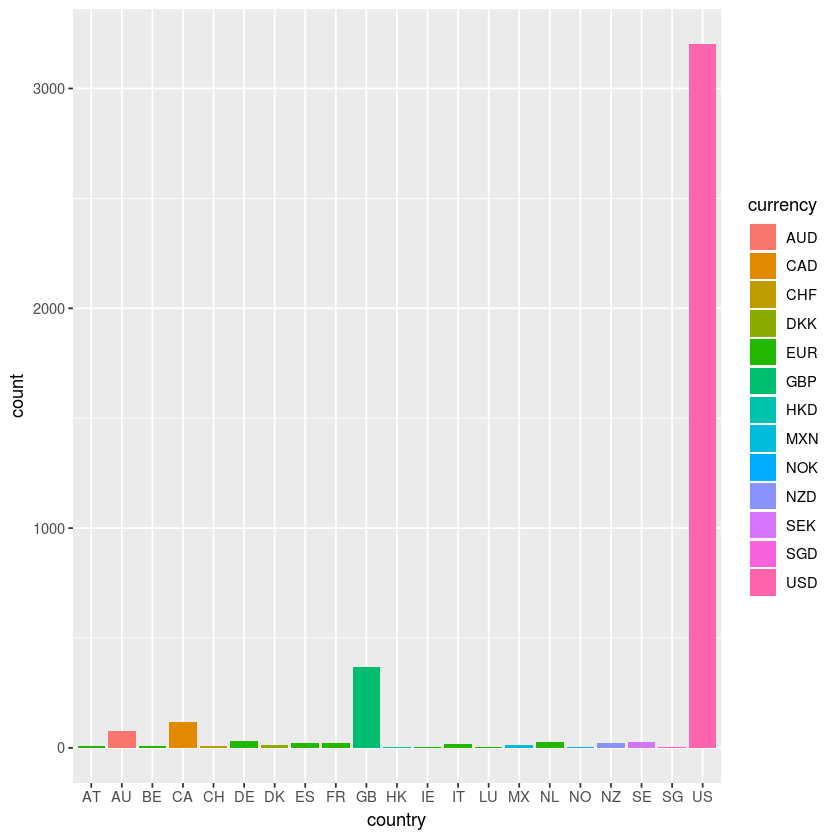

In [14]:
ggplot(data=kick) + geom_histogram(aes(x=country,fill=currency),stat="count")

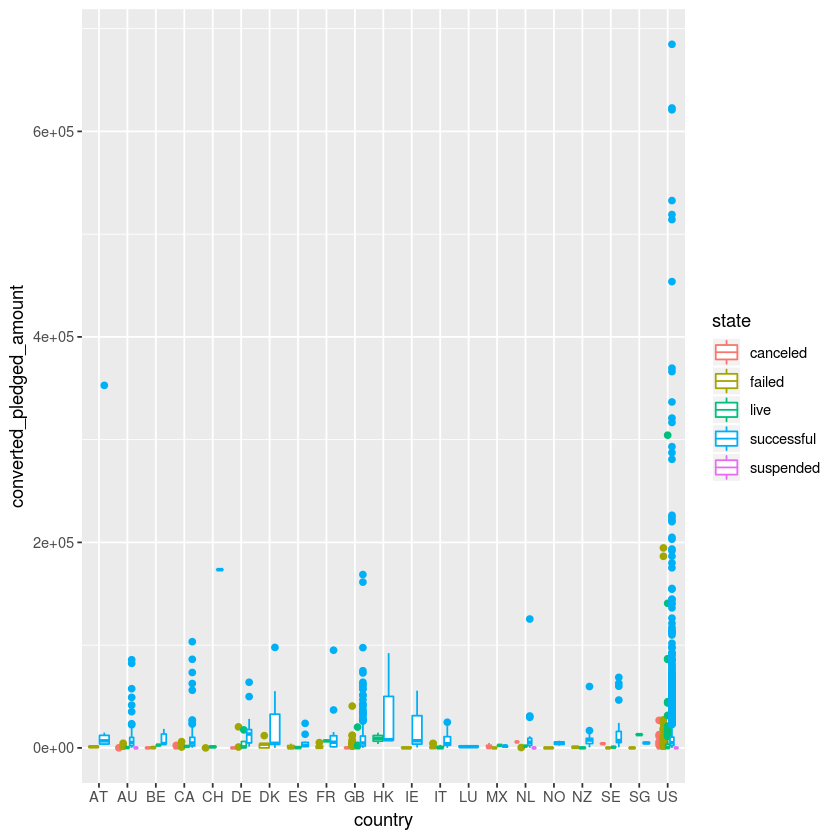

In [19]:
ggplot(data=kick) + geom_boxplot(aes(x=country,y=converted_pledged_amount,col=state))

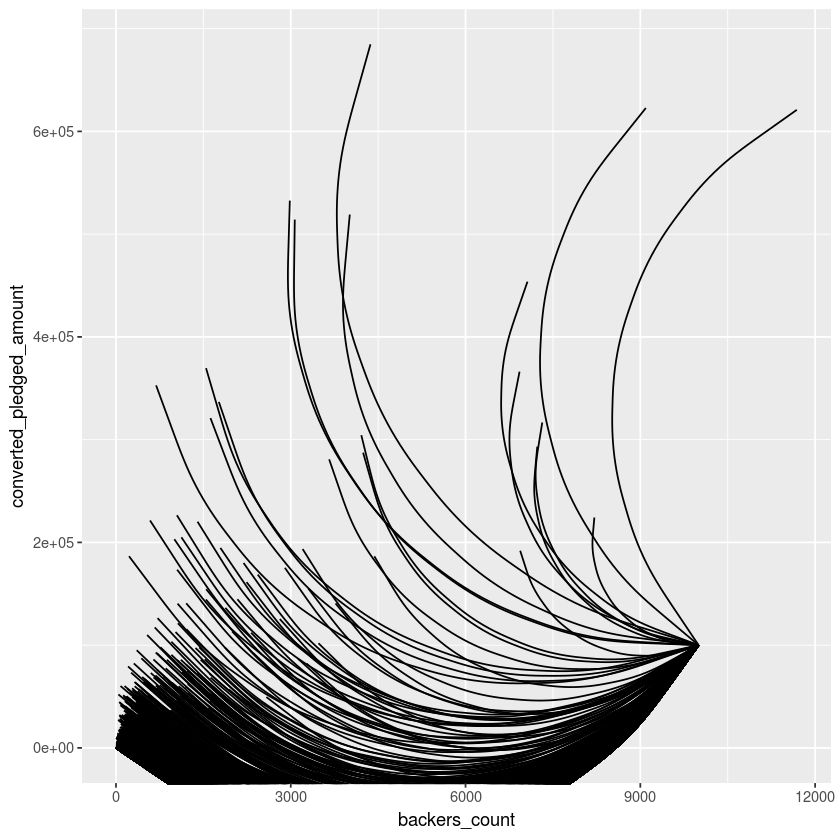

In [22]:
ggplot(data=kick) + geom_curve(aes(x=backers_count,y=converted_pledged_amount,xend=1e4,yend=1e5))

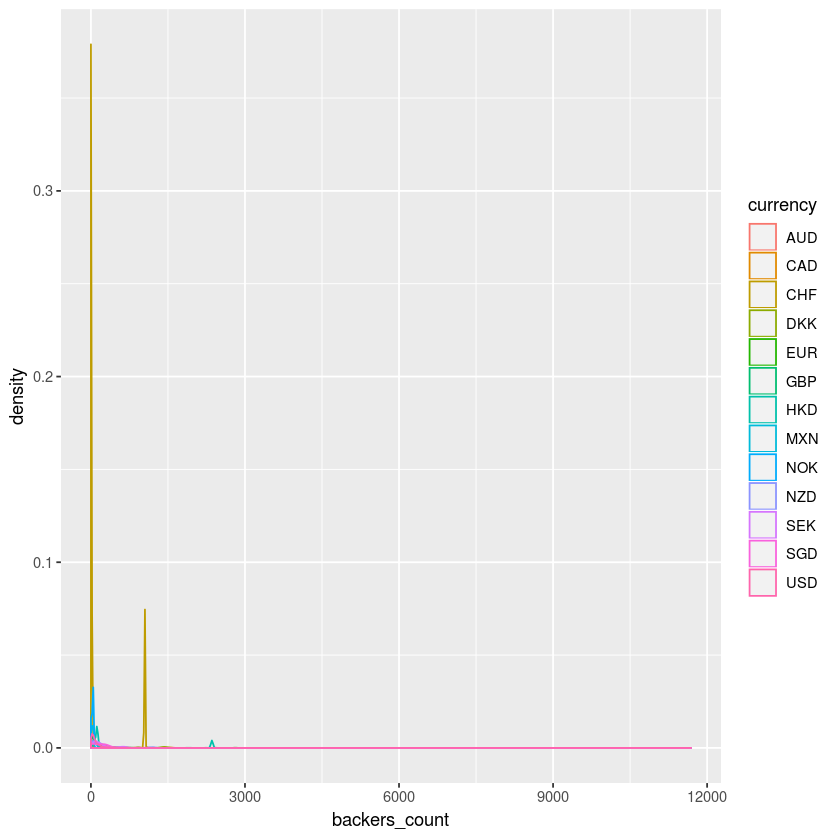

In [26]:
ggplot(data=kick) + geom_density(aes(x=backers_count,col=currency))

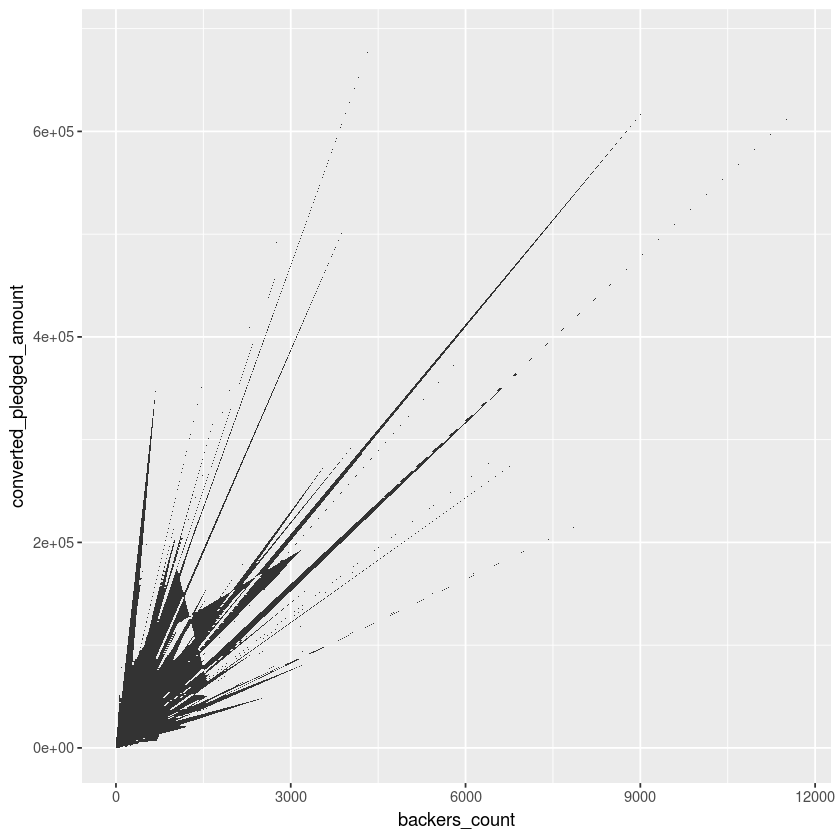

In [29]:
ggplot(data=kick) + geom_polygon(aes(x=backers_count,y=converted_pledged_amount))

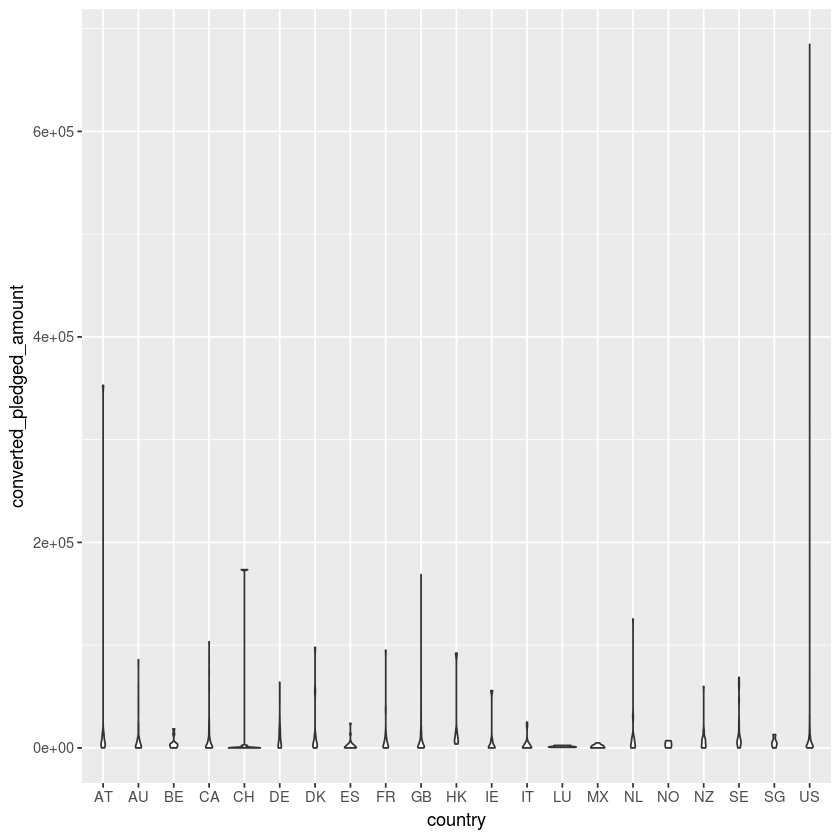

In [32]:
ggplot(data=kick) + geom_violin(aes(x=country,y=converted_pledged_amount))

E podemos gerar ate um mapa de calor por exemplo, dado a estrutura que data no ggplot e sempre um dataframe, utilizaremos o pacote reshape2 para converter uma matriz a um dataframe

O usuario pode mudar a distribuição de probabilidade e parametros associados e verificar como este mapa varia

In [34]:
require(reshape2)
mat=matrix(rnorm(n = 1e4,mean = 0,sd = 1))


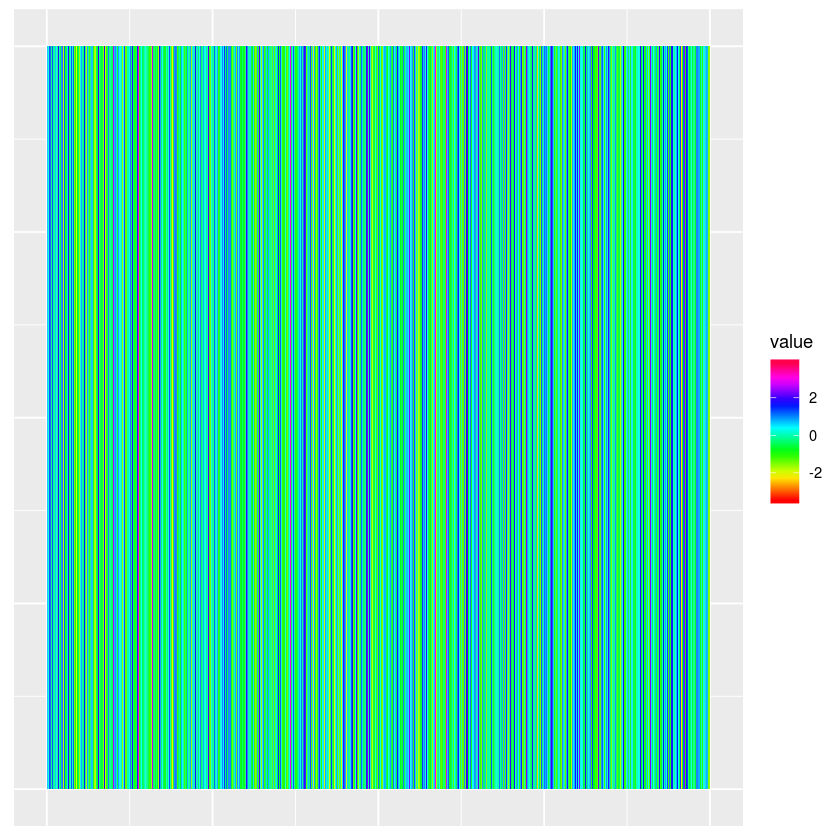

In [35]:
mat=melt(mat)
MapaDeCalor=ggplot(data = mat, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + labs(x="",y=""  ) + theme(axis.title.x=element_blank(),
      axis.text.x=element_blank(),
        axis.ticks.x=element_blank() ,axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank() )    
MapaDeCalor=MapaDeCalor+scale_fill_gradientn(colours = rainbow(20)) 
print(MapaDeCalor)